## 0. Install and import Dependencies


## 1.Read in Image , Grayscale and Blur


## 2.Apply Filter and find Edges for Localization


## 3.Find contours and Apply Mask


## 4.Use Easy OCR to Read Text


## 5.Render Result

## 0. Install and import Dependencies

In [118]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117


In [26]:
!pip install numpy

In [27]:
!pip install easyocr
!pip install imutils

In [1]:
import cv2

In [2]:
from matplotlib import pyplot as plt

In [3]:
import numpy as np

In [4]:
import imutils

In [5]:
import easyocr

## 1.Read in Image , Grayscale and Blur

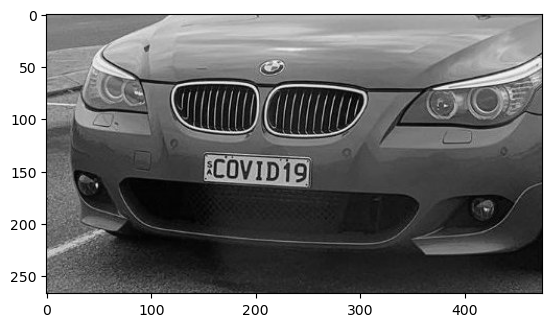

In [16]:
img = cv2.imread('image2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

## 2.Apply Filter and find Edges for Localization

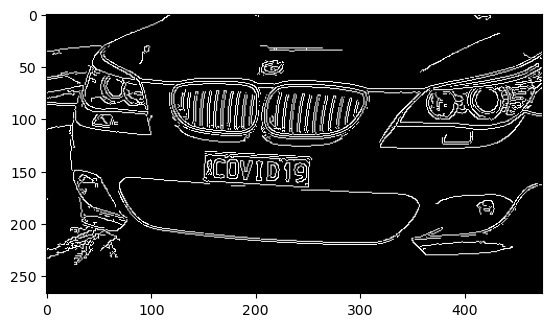

In [17]:
bfilter = cv2.bilateralFilter(gray,11,17,17) #Noise reduction
edged = cv2.Canny(bfilter,30,200) #Edge Detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

## 3.Find contours and Apply Mask

In [18]:
keypoints= cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours , key = cv2.contourArea, reverse = True)[:10]

In [19]:
location = None
for contour in contours:
    approx=cv2.approxPolyDP(contour,10,True)
    if len(approx)==4:
        location = approx
        break

In [20]:
location

array([[[152, 136]],

       [[248, 139]],

       [[251, 164]],

       [[153, 160]]], dtype=int32)

In [28]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

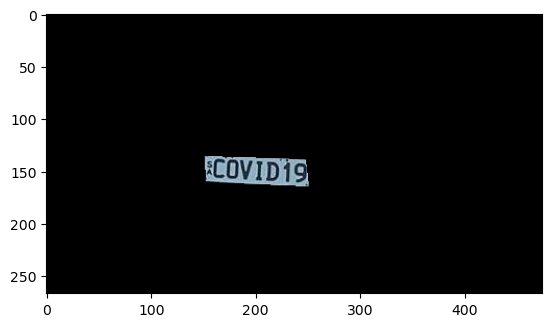

In [29]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [30]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

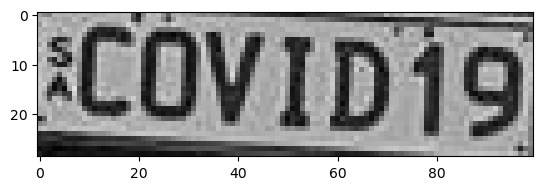

In [31]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 4. Use Easy OCR To Read Text

In [32]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [100, 0], [100, 29], [0, 29]], 'ICOVIDT9', 0.5275640804797114)]

## 5. Render Result

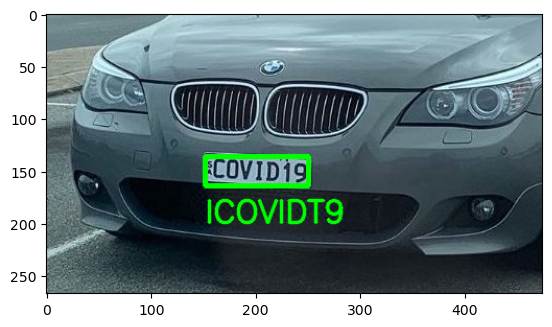

In [33]:

text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))